# <span style="color:green"> Numerical Simulation Laboratory (NSL) </span>
## <span style="color:blue">  Numerical exercises 8</span>


The variational principle in Quantum Mechanics states that the expectation value of the Hamiltonian over a (good) trial quantum state has the ground state energy $E_0$ as lower bound:

$$
\langle {\hat H} \rangle_T = 
\frac{\int dx \Psi^*_T(x) {\hat H} \Psi_T(x)}
{\int dx |\Psi_T(x)|^2} \ge E_0 =
\frac{\langle \Psi_0| {\hat H} | \Psi_0 \rangle}
{\langle \Psi_0 | \Psi_0 \rangle}
$$

During this exercise you will variationally optimize the ground state of a single quantum particle in a one dimensional (1D) space confined by the following external potential:
$$
V(x) = x^4 - \frac{5}{2}x^2
$$

This 1D quantum model is not analytically solvable and should be attacked by numerical methods. In order to obtain an approximate wave function for the ground state, the Variational Monte Carlo method uses a trial wave function, parametrized by a set of variational parameters. An approximate model for the ground state wave function is the following trial wave function:
$$
\Psi_T^{\sigma,\mu}(x) \propto e^{-\frac{(x-\mu)^2}{2\sigma^2}}+
                               e^{-\frac{(x+\mu)^2}{2\sigma^2}}
$$

$\Psi_T^{\sigma,\mu}(x)$ depends on <span style="color:red">two variational parameters: $\sigma$ and $\mu$</span>.

### Exercise 08.1

Write a Variational Monte Carlo code for a single quantum particle in 1D which exploits the Metropolis algorithm to sample the square modulus of our trial wave function $|\Psi_T^{\sigma,\mu}(x)|^2$ using an uniform transition probability $T(x_{new}|x_{old})$. By using data blocking, the code should be able to compute the expectation value for the Hamiltonian

$$
\langle {\hat H} \rangle_T = 
\frac{\int dx \Psi^*_T(x) {\hat H} \Psi_T(x)}
{\int dx |\Psi_T(x)|^2} = 
\int dx \frac{|\Psi_T(x)|^2}{\int dx |\Psi_T(x)|^2} \frac{{\hat H} \Psi_T(x)}{\Psi_T(x)}
$$

which can be used to find the parameters that minimize this quantity. Use $\hbar = 1$ and $m=1$.
<span style="color:red">Note that to measure $\langle {\hat H} \rangle_T$ you need the analytical calculation of:</span>
    
$$
\frac{{-\frac{\hbar^2}{2m}\frac{\partial^2}{\partial x^2}} \Psi_T^{\sigma,\mu}(x)}{\Psi_T^{\sigma,\mu}(x)}
$$

# Math

For the sampling process as previously explained we need to calculate  the ratio.
First we can observe that we can divide $ \Psi^{\sigma,\mu}_T $ as $\Psi^{\sigma,\mu}_T = \Psi^{\sigma,\mu}_{T+} + \Psi^{\sigma,\mu}_{T-} $.
For the derivation $\sigma$ and $\mu$ are just constants, same as $T$, so to lighten the notation we will just write:

$$
    \Psi = \Psi_{+} + \Psi_{-}\\
    \Psi_{\pm} = e^{-\frac{\left(x \pm \mu\right)^2}{2\sigma^2}}
$$



We will show calculation of the second derivative for $\Psi_{\pm}$.

$$
\begin{aligned}
    \frac{\partial\Psi_{\pm}}{\partial x} &= -\frac{2\left(x \pm \mu\right)}{2\sigma^2}e^{-\frac{(x\pm\mu)^2}{2\sigma^2}}\\
    &= -\frac{x\pm\mu}{\sigma^2}\Psi_{\pm}
\end{aligned}
$$

From this point it is easy to get second derivative:

$$
\begin{aligned}
    \frac{\partial^2 \Psi_{\pm}}{\partial x^2} &= -\frac{1}{\sigma^2}\Psi_\pm - \frac{x\pm\mu}{\sigma^2}\frac{\partial \Psi_\pm}{\partial x}\\
    &= \left[\left(\frac{x\pm\mu}{\sigma^2}\right)^2 -\frac{1}{\sigma^2}\right]\Psi_\pm
\end{aligned}
$$


Finally it is possible to get the derivative using the linear property of derivation:

$$
\begin{aligned}
    \frac{\partial^2 \Psi}{\partial x^2} &= \frac{\partial^2 \Psi_+}{\partial x^2} + \frac{\partial^2 \Psi_-}{\partial x^2}\\
    &= \left[\left(\frac{x+\mu}{\sigma^2}\right)^2 -\frac{1}{\sigma^2}\right]\Psi_+
    + \left[\left(\frac{x-\mu}{\sigma^2}\right)^2 -\frac{1}{\sigma^2}\right]\Psi_-\\
    &= \frac{1}{\sigma^4}
    \left[
        \left(x^2+\mu^2-\sigma^2\right)\left(\Psi_++\Psi_-\right)
        +2\mu x\left(\Psi_+-\Psi_-\right)
    \right]
\end{aligned}
$$

At this point we can notice that $\Psi_+ + \Psi_- = \Psi$. We can expand this expression and we got:

$$
\begin{aligned}
    \Psi&=\exp{\left(-\frac{(x+\mu)^2}{\sigma^2}\right)} + \exp{\left(-\frac{(x-\mu)^2}{\sigma^2}\right)}\\
    &=\exp{\left(-\frac{x^2+\mu^2}{2\sigma^2}\right)}\left(\exp{-\frac{\mu x}{\sigma^2}}+ \exp{\frac{\mu x}{\sigma^2}}\right)\\
    &=2 \exp{\left(-\frac{x^2+\mu^2}{2\sigma^2}\right)} \cosh{\frac{\mu x }{\sigma^2}}
\end{aligned}
$$
This last expansion was used in the codebase, this is due to the fact that permits two semplification:

- for a value of the exponential argument below $-708.4$, by IEEE standard, the exponential function implementation should underflow, in this context we can just return $0$.
- Hyperbolic cosine permits  an higher value than exponential, before we get an overflow error.

We can expand $\Psi_+ - \Psi_-$ in a similar manner, and we get:

$$
    \Psi_+ - \Psi_- = - 2 \exp{\left(-\frac{x^2+\mu^2}{2\sigma^2}\right)} \sinh{\frac{\mu x }{\sigma^2}}
$$

Using this last expression we get:

$$
\begin{aligned}
    \frac{\partial^2 \Psi}{\partial x^2} &= \frac{1}{\sigma^4}
    \left[
        \left(x^2+\mu^2-\sigma^2\right)\Psi
        -4\mu x \exp{\left(-\frac{x^2+\mu^2}{2\sigma^2}\right)} \sinh{\frac{\mu x }{\sigma^2}}
    \right]
\end{aligned}
$$

From this we get:
$$
\begin{aligned}
    \frac{\frac{\partial^2}{\partial x^2} \Psi(x)}{\Psi(x)} &=\frac{\frac{1}{\sigma^4}
    \left[
        \left(x^2+\mu^2-\sigma^2\right)\Psi
        -4\mu x \exp{\left(-\frac{x^2+\mu^2}{2\sigma^2}\right)} \sinh{\frac{\mu x }{\sigma^2}}
    \right]}{\Psi}\\
    &= \frac{1}{\sigma^4}\left[ \left(x^2 + \mu^2 - \sigma^2\right) -2\mu x \tanh{\frac{\mu x}{\sigma^2}}\right]\\
    &= \frac{1}{\sigma^2}\left[ \left(\frac{x^2 + \mu^2}{\sigma^2} - 1\right) -2\frac{\mu x}{\sigma^2} \tanh{\frac{\mu x}{\sigma^2}}\right]
\end{aligned}
$$

This last formula was used in implementing the kinetic term of the energy, due to some computational advantage in reducing number of required operation.

### Exercise 08.2

To find the parameters $\sigma$ and $\mu$ which minimize $\langle {\hat H} \rangle_T$, extend your Variational Monte Carlo code to face the variational optimization problem via a <span style="color:red">Simulated Annealing (SA) algorithm</span>.

Choose an appropriate starting temperature for your SA algorithm and an appropriate temperature-update-law to make the optimization work.

Compute $\langle {\hat H} \rangle_T$ with enough statistics in order to be able to measure the lowering of $\langle {\hat H} \rangle_T$ once the variational parameters are moved.

- [x] <span style="color:red">Show a picture of $\langle {\hat H} \rangle_T$ (with statistical uncertainties) as a function of the SA steps of the algorithm</span>
- [x] you could also show a picture of the trajectory of the SA algorithm in the variational parameter space as a function of the SA steps
- [ ] <span style="color:red">show a picture of the estimation of $\langle {\hat H} \rangle_T$ </span> and its statistical uncertainty as a function of the number of blocks/MC steps <span style="color:red">for the set of parameters which minimize $\langle {\hat H} \rangle_T$</span>
- [x] <span style="color:red">show also a picture **of the sampled** $|\Psi_T(x)|^2$</span> by filling a histogram with the sampled configurations, moreover compare it with the analytic curve of $|\Psi_T(x)|^2$ and with the numerical solution obtained by transforming the Schrodinger equation into a matrix equation (see below the supplementary material).

### <span style="color:green">Supplementary material</span>

How can we describe a wave function as a vector? We set up a lattice of discrete points, spaced by a constant distance $dx$, and record the value of the function at each lattice point. In this way the wave function, $\Psi(x)$ become a vector:

$$
\Psi(x) \to \left[ \Psi(x_1), \Psi(x_2), ..., \Psi(x_N) \right] = 
\left[ \Psi_1, \Psi_2, ..., \Psi_N \right]
$$

The time independent Schrodinger equation 

$$
{\hat H} \Psi(x) = \left( -\frac{\hbar^2}{2m}\frac{\partial^2}{\partial x^2} + V(x) \right) \Psi(x) = E \Psi(x)
$$

can be written in matrix form. But how do we write the second derivative at a particular point? Let's start with the first derivatives:
$$
\frac{\partial}{\partial x} \Psi\left(x=(x_i+x_{i+1})/2\right) \simeq \frac{\Psi_{i+1}-\Psi_{i}}{dx}\\
\frac{\partial}{\partial x} \Psi\left(x=(x_i+x_{i-1})/2\right) \simeq \frac{\Psi_{i}-\Psi_{i-1}}{dx}
$$

Thus, we can discretize the second derivative in the following way:
$$
\frac{\partial^2}{\partial x^2} \Psi(x=x_i) =
\frac{\frac{\partial}{\partial x} \Psi\left(x=(x_i+x_{i+1})/2\right) - \frac{\partial}{\partial x} \Psi\left(x=(x_i+x_{i-1})/2\right)}{dx} =
\frac{\Psi_{i+1}-2\Psi_{i}+\Psi_{i-1}}{dx^2}
$$

We finally obtain:

$$
\begin{bmatrix}
 \frac{\hbar^2}{m\,dx^2}+V(x_1)& -\frac{\hbar^2}{2m\,dx^2} & 0 & \dots  & 0 \\
-\frac{\hbar^2}{2m\,dx^2} & \frac{\hbar^2}{m\,dx^2}+V(x_2) & -\frac{\hbar^2}{2m\,dx^2} & \dots  & 0 \\
 0                        & -\frac{\hbar^2}{2m\,dx^2} & \frac{\hbar^2}{m\,dx^2}+V(x_3) & \dots  & 0 \\
 \vdots                   & \vdots                    & \vdots & \ddots & \vdots \\
 0                    & 0                & 0 & \dots  & \frac{\hbar^2}{m\,dx^2}+V(x_N)
\end{bmatrix}
\begin{bmatrix}
\Psi_{1} \\
\Psi_{2} \\
\vdots \\
\Psi_{N}
\end{bmatrix}
= E
\begin{bmatrix}
\Psi_{1} \\
\Psi_{2} \\
\vdots \\
\Psi_{N}
\end{bmatrix}
$$

To solve the time independent Schrodinger equation we therefore have to find eigenstates and eigenvalues of the matrix just obtained.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

Ground state energy:  -0.4604658796927155
1st excited state energy:  0.09742471331761006
2nd excited state energy:  1.9717331343930213


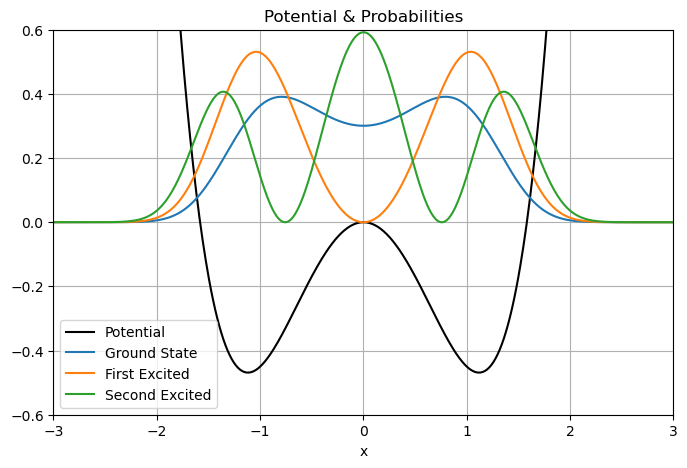

In [2]:
def Vpot(x):
    return (x**2 - 2.5) * x**2
    # return 0.5*x**2


hbar = 1
m = 1
a = 10
N = 1000  # number of iterations

# Step sizes
x = np.linspace(-a / 2, a / 2, N)
dx = x[1] - x[0]  # the step size
V = Vpot(x)

# The central differences method: f" = (f_1 - 2*f_0 + f_-1)/dx^2

CDiff = (
    np.diag(np.ones(N - 1), -1)
    - 2 * np.diag(np.ones(N), 0)
    + np.diag(np.ones(N - 1), 1)
)
# np.diag(np.array,k) construct a "diagonal" matrix using the np.array
# The default is k=0. Use k>0 for diagonals above the main diagonal,
# and k<0 for diagonals below the main diagonal

# Hamiltonian matrix
H = (-(hbar**2) * CDiff) / (2 * m * dx**2) + np.diag(V)

# Compute eigenvectors and their eigenvalues
E, psi = np.linalg.eigh(H)

# Take the transpose & normalize
psi = np.transpose(psi)
psi = psi / np.sqrt(dx)

print("Ground state energy: ", E[0])
print("1st excited state energy: ", E[1])
print("2nd excited state energy: ", E[2])

# Plot a few things
plt.figure(figsize=(8, 5))
scale = 0.3
plt.plot(x, scale * V, color="Black", label="Potential")  # plot the potential
plt.plot(x, (psi[0]) ** 2, label="Ground State")
plt.plot(x, (psi[1]) ** 2, label="First Excited")
plt.plot(x, (psi[2]) ** 2, label="Second Excited")
plt.title("Potential & Probabilities")
plt.xlabel("x")
plt.grid(True)
plt.xlim((-3, 3))
plt.ylim((-0.6, 0.6))
plt.legend()
plt.show()

In [3]:
df = pd.read_csv("eser_8/8_2/output.csv")
df

,temperature,mu,sigma,energy,err_energy
0,1000.000,1.044373,0.580395,-0.193540,0.002205
1,1000.000,1.140441,0.517994,0.070290,0.002218
2,1000.000,1.160263,0.550339,0.105064,0.002806
3,1000.000,1.112589,0.649883,0.028527,0.004526
4,1000.000,1.168459,0.612266,0.162521,0.004387
...,...,...,...,...,...
1005,0.001,0.782444,0.613695,-0.443589,0.000697
1006,0.001,0.782249,0.613725,-0.442983,0.000694
1007,0.001,0.782255,0.613993,-0.444556,0.000685
1008,0.001,0.782476,0.613097,-0.442642,0.000682


Last Value of Energy: -0.4434320068


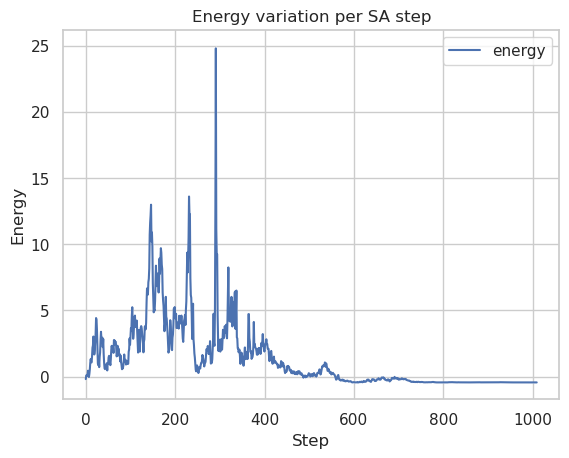

In [4]:
sns.set_theme(style="whitegrid")


def custom_errorbar(x, y, err, **kwargs):
    plt.plot(x, y, **kwargs)
    plt.fill_between(x, y - err, y + err, alpha=0.5)
    plt.legend()


custom_errorbar(df.index, df["energy"], df["err_energy"], label="energy")
plt.xlabel("Step")
plt.ylabel("Energy")
plt.title("Energy variation per SA step")
print("Last Value of Energy:", df["energy"].iloc[-1])

Text(0.5, 0.98, 'Parameter Space Exploration')

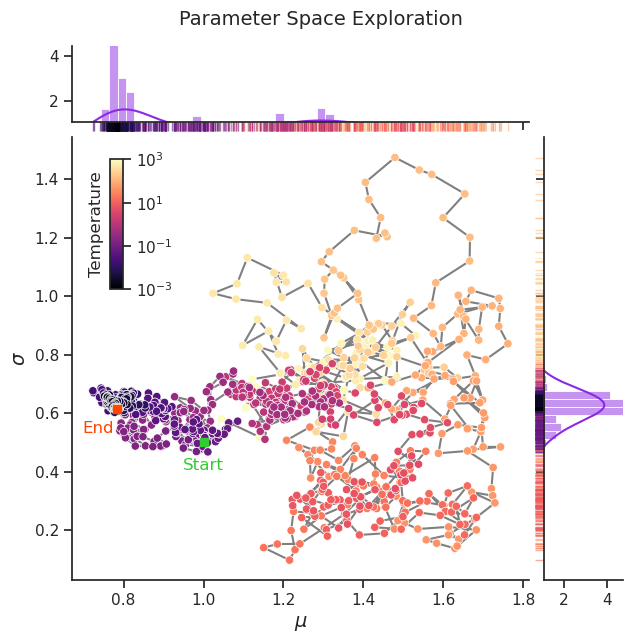

In [5]:
from matplotlib.colors import LogNorm
from matplotlib.cm import ScalarMappable

sns.set_theme(style="ticks", context="notebook")

palette = "magma"

g = sns.JointGrid(x="mu", y="sigma", data=df, marginal_ticks=True, height=6.5, ratio=5)

g.plot_joint(
    sns.lineplot,
    sort=False,
    color="grey",
    legend=False,
    zorder=-1,
)

g.plot_joint(
    sns.scatterplot,
    data=df,
    hue="temperature",
    palette=palette,
    hue_norm=LogNorm(),
    legend=False,
)


g.plot_marginals(sns.histplot, kde=True, bins=50, stat="density", color="blueviolet")

g.plot_marginals(
    sns.rugplot,
    height=-0.12,
    clip_on=False,
    data=df,
    hue="temperature",
    palette=palette,
    hue_norm=LogNorm(),
    alpha=0.6,
)

g.set_axis_labels(r"$\mu$", r"$\sigma$", size=14)

# Colobar
cax = g.figure.add_axes([0.175, 0.55, 0.02, 0.2])

norm = LogNorm(df["temperature"].min(), df["temperature"].max())
sm = ScalarMappable(cmap=palette, norm=norm)
sm.set_array([])

cb = cax.figure.colorbar(sm, cax=cax)
cb.set_label("Temperature", loc="center", labelpad=-60)

# Annotating Start and End Point

first_point = np.array([1, 0.5])

g.ax_joint.plot(*first_point, marker="s", color="limegreen")

last_point = df.iloc[-1].loc[["mu", "sigma"]].to_numpy()

g.ax_joint.plot(*last_point, marker="s", color="orangered", zorder=10)

g.ax_joint.annotate(
    "Start",
    first_point,
    textcoords="offset points",
    xytext=(0, -20),
    ha="center",
    fontsize=12,
    color="limegreen",
)
g.ax_joint.annotate(
    "End",
    last_point,
    textcoords="offset points",
    xytext=(-13, -17),
    ha="center",
    fontsize=12,
    color="orangered",
)

g.figure.subplots_adjust(top=0.925)
g.figure.suptitle("Parameter Space Exploration", fontsize=14)

## Energy mean value extimation

The results here presented were obtained using data blocking technique. In this case, 1000 blocks were calculated, each consisting of 100 steps.

It can be noted that the obtained energy is greater than ground state energy.
This is due to two factors:
- The first one, and more important is that an approximation to the ground state wavefunction was used.
- The second is that Simulated Annealing produces an approximation to the optimal parameters, so it cannot garantue to produce an optimal solution.

Text(0, 0.5, 'Energy')

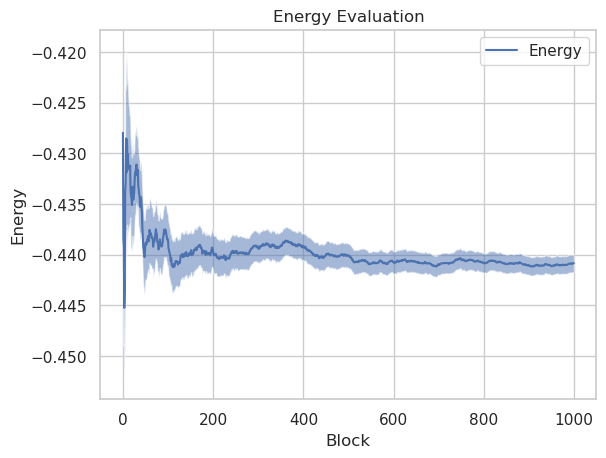

In [42]:
energy_df = pd.read_csv("eser_8/8_2/energy_evaluation.csv")
custom_errorbar(
    energy_df["Block"], energy_df["Energy"], energy_df["Error"], label="Energy"
)
plt.title("Energy Evaluation")
plt.xlabel("Block")
plt.ylabel("Energy")

# Wave function comparison

0.7822224153 0.6136970902


Text(0.5, 1.0, 'Wavefunction Comparison')

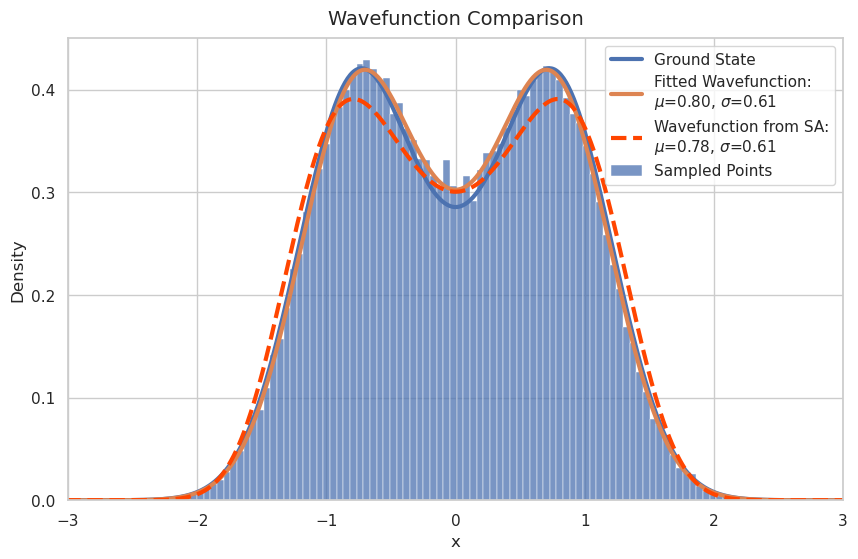

In [32]:
from scipy.optimize import curve_fit

sns.set_theme(style="whitegrid")
print(*last_point)


def normalized_psi_squared(x: np.ndarray, mu: float, sigma: float):
    inv_sigma_squared: float = 1.0 / (sigma * sigma)
    norm = 1.0 / (
        sigma * np.sqrt(np.pi) * (1.0 + np.exp(-(mu * mu) * inv_sigma_squared))
    )
    exponent = -(x * x + mu * mu) * inv_sigma_squared
    cosh_arg = 2.0 * mu * x * inv_sigma_squared

    return norm * np.exp(exponent) * (np.cosh(cosh_arg) + 1.0)


psi_plotted = np.loadtxt("eser_8/8_2/wave_function.csv", delimiter=",")
opt_param, cov_param = curve_fit(normalized_psi_squared, x, psi[0], p0=last_point)

df_sampling = pd.read_csv("eser_8/8_2/sampled.csv")

# Plotting
ax = sns.histplot(data=df_sampling, x="x", bins=100, stat="density")
ax.plot(
    x,
    normalized_psi_squared(x, *opt_param),
    lw=3,
)
ax.plot(
    psi_plotted[:, 0],
    psi_plotted[:, 1],
    lw=3,
)
ax.plot(
    x,
    (psi[0]) ** 2,
    c="orangered",
    ls="--",
    lw=3,
)

legend_labels = [
    "Ground State",
    "Fitted Wavefunction:\n$\mu$={:.2f}, $\sigma$={:.2f}".format(*opt_param),
    "Wavefunction from SA:\n$\mu$={:.2f}, $\sigma$={:.2f}".format(*last_point),
    "Sampled Points",
]

plt.gcf().set_size_inches(10, 6)
ax.legend(legend_labels)
ax.set_xlim(-3, 3)
ax.set_title("Wavefunction Comparison", fontsize=14, pad=10)
# ax[0, 0].plot(x, y * y / (delta_x * y.sum()))